In [26]:
print("hello World!")

hello World!


In [188]:
# Dependencies
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats as st
import numpy as np
import requests
import time
import gmaps
import json
from pprint import pprint

# Import API key
from config import api_key
from config import g_key

In [28]:
# Study data files
project_path = "Project_df.csv"

# Read the csv file
Project_df = pd.read_csv(project_path)

# Display the data table for preview
Project_df

,Client ID,Town,State,Month,Quarter,Year,Category,Distributor,Min Monthly Sales,Total Sales,Compliance,Total Points,Points Worth ($)
0,2,Tlalnepantla,Ciudad de Mexico,1,1,2018,C4,D5,59000,51951,0.88,0,0.00
1,2,Tlalnepantla,Ciudad de Mexico,2,1,2018,C4,D5,59000,15301,0.26,0,0.00
2,2,Tlalnepantla,Ciudad de Mexico,5,2,2018,C4,D5,59000,19807,0.34,0,0.00
3,2,Tlalnepantla,Ciudad de Mexico,6,2,2018,C4,D5,59000,16916,0.29,0,0.00
4,2,Tlalnepantla,Ciudad de Mexico,8,3,2018,C4,D5,59000,88353,1.50,1080,928.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14579,1371,Colima,Colima,11,4,2020,C4,D12,59000,218149,3.70,164,141.04
14580,1371,Colima,Colima,12,4,2020,C4,D12,59000,119233,2.02,10334,8887.24
14581,1372,Tezontepec,Hidalgo,10,4,2020,C2,D15,23000,26834,1.17,172,147.92
14582,1372,Tezontepec,Hidalgo,11,4,2020,C2,D15,23000,35671,1.55,123,105.78


# Part 1 - Statistical Analysis.

####  We will use statistical analysis to understand our data

In [88]:
# Filtering the data by year to run aggregate function.
gb_year = Project_df.groupby('Year')

Project_18_df = gb_year.get_group(2018)
Project_19_df = gb_year.get_group(2019)
Project_20_df = gb_year.get_group(2020)

In [96]:
# Working with 2018 Data by Category Sales
stats_summary_2018_df = (Project_18_df.groupby("Category")["Total Sales"].agg(["min","max", "sum", "mean","median","var","std","sem"]).style.format('${0:,.2f}'))
stats_summary_2018_df

,min,max,sum,mean,median,var,std,sem
Category,,,,,,,,
C1,$0.00,"$266,897.00","$25,070,191.00","$19,329.37","$15,882.00","$280,700,450.39","$16,754.12",$465.21
C2,$0.00,"$883,310.00","$55,162,763.00","$32,854.53","$28,279.00","$1,099,445,958.73","$33,157.89",$809.21
C3,$319.00,"$250,064.00","$44,206,730.00","$53,197.03","$48,830.00","$883,855,335.33","$29,729.70","$1,031.31"
C4,$0.00,"$714,675.00","$55,260,572.00","$95,441.40","$86,407.00","$3,431,020,736.59","$58,574.92","$2,434.29"
C5,"$2,590.00","$471,584.00","$31,641,029.00","$140,004.55","$139,181.50","$4,078,173,565.60","$63,860.58","$4,247.94"
C6,$0.00,"$1,817,422.00","$106,768,184.00","$311,277.50","$269,100.00","$38,392,288,815.20","$195,939.50","$10,579.74"


In [95]:
# Working with 2019 Data by Category Sales
stats_summary_2019_df = (Project_19_df.groupby("Category")["Total Sales"].agg(["min","max", "sum","mean","median","var","std","sem"]).style.format('${0:,.2f}'))
stats_summary_2019_df

,min,max,sum,mean,median,var,std,sem
Category,,,,,,,,
C1,$0.00,"$128,134.00","$24,038,989.00","$16,133.55","$12,990.00","$170,505,911.32","$13,057.79",$338.28
C2,$0.00,"$494,892.00","$50,900,948.00","$28,888.17","$25,665.00","$533,468,753.33","$23,096.94",$550.24
C3,$0.00,"$276,884.00","$39,043,982.00","$52,128.15","$48,337.00","$970,088,304.31","$31,146.24","$1,138.06"
C4,$0.00,"$498,979.00","$48,892,273.00","$88,572.96","$82,104.50","$3,510,982,398.64","$59,253.54","$2,522.00"
C5,"$1,385.00","$457,897.00","$32,252,683.00","$123,573.50","$122,440.00","$5,222,577,854.33","$72,267.41","$4,473.24"
C6,$341.00,"$1,245,154.00","$102,348,571.00","$308,278.83","$260,843.00","$33,688,378,715.54","$183,543.94","$10,073.28"


In [94]:
# Working with 2020 Data by Category Sales
stats_summary_2020_df = (Project_20_df.groupby("Category")["Total Sales"].agg(["min","max", "sum","mean","median","var","std","sem"]).style.format('${0:,.2f}'))
stats_summary_2020_df

,min,max,sum,mean,median,var,std,sem
Category,,,,,,,,
C1,$0.00,"$209,363.00","$22,184,026.00","$16,780.66","$13,351.50","$234,235,777.25","$15,304.76",$420.93
C2,$0.00,"$280,652.00","$45,200,853.00","$31,854.02","$27,790.00","$551,393,157.08","$23,481.76",$623.36
C3,$688.00,"$458,634.00","$31,610,226.00","$50,902.14","$43,872.00","$1,518,277,993.29","$38,965.09","$1,563.62"
C4,$0.00,"$288,327.00","$41,579,901.00","$72,312.87","$66,679.00","$2,372,719,738.50","$48,710.57","$2,031.37"
C5,$0.00,"$437,069.00","$31,395,872.00","$130,816.13","$123,018.50","$6,809,285,103.14","$82,518.39","$5,326.54"
C6,"$25,628.00","$3,964,935.00","$104,691,580.00","$342,129.35","$269,847.50","$138,748,704,311.53","$372,489.87","$21,293.83"


# Part 2 - Analyzing Data by Number of Clients.

#### We will try to analyze if the Number of Clients has a direct impact on the Total Sales, regardless of their Category 

In [150]:
# We will create a Data Frame with the number of different clients we had for each month of the three years
clients_by_month = Project_df.groupby('Year')

client_no_18 = pd.DataFrame(clients_by_month.get_group(2018))
client_no_18 = client_no_18.groupby('Month').count()[["Client ID"]]
client_no_18 = client_no_18.values.tolist()

client_no_19 = pd.DataFrame(clients_by_month.get_group(2019))
client_no_19 = client_no_19.groupby('Month').count()[["Client ID"]]
client_no_19 = client_no_19.values.tolist()

client_no_20 = pd.DataFrame(clients_by_month.get_group(2020))
client_no_20 = client_no_20.groupby('Month').count()[["Client ID"]]
client_no_20 = client_no_20.values.tolist()

clients_number = client_no_18 + client_no_19 + client_no_20
months = list(range(1, 37))

clients_by_month = pd.DataFrame(clients_number, index = months, columns =['Number of DIfferent Clients']) 
clients_by_month

,Number of DIfferent Clients
1,405
2,391
3,399
4,398
5,399
6,414
7,410
8,422
9,427
10,427


<IPython.core.display.Javascript object>


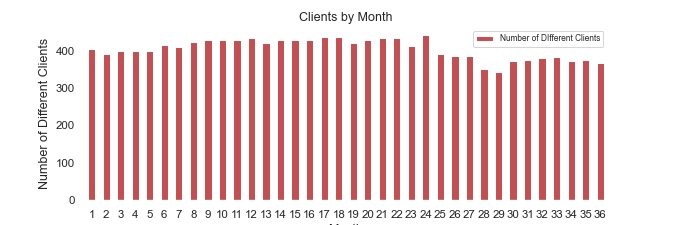

In [136]:
# Plotting that Data Frame
clients_by_month.plot(kind="bar", color="r", figsize=(9,3))

plt.title("Clients by Month")
plt.xlabel("Month")
plt.ylabel("Number of Different Clients")
plt.legend(loc=1, prop={'size': 8})
plt.xticks(rotation = 0)

plt.show()

plt.savefig("plots/Count of different clients by month.png")

# Acá va la parte de Erick del histograma de las ventas en los 36 meses.

#### Acá va el data frame

#### Acá va el plot 

# Termina la parte de Erick.

In [176]:
# We will compare if Sales and Number of Clients hold a relation
sales_by_month = Project_df.groupby('Year')

total_sales_18 = pd.DataFrame(sales_by_month.get_group(2018))
total_sales_18 = total_sales_18.groupby('Month').sum()[["Total Sales"]]
total_sales_18 = total_sales_18.values.tolist()

total_sales_19 = pd.DataFrame(sales_by_month.get_group(2019))
total_sales_19 = total_sales_19.groupby('Month').sum()[["Total Sales"]]
total_sales_19 = total_sales_19.values.tolist()

total_sales_20 = pd.DataFrame(sales_by_month.get_group(2020))
total_sales_20 = total_sales_20.groupby('Month').sum()[["Total Sales"]]
total_sales_20 = total_sales_20.values.tolist()

total_sales_by_month = total_sales_18 + total_sales_19 + total_sales_20

total_sales = pd.DataFrame(total_sales_by_month, index = months, columns =['Total Sales'])
total_sales["Number of DIfferent Clients"] = clients_by_month["Number of DIfferent Clients"]
total_sales = total_sales.set_index("Number of DIfferent Clients")
total_sales

,Total Sales
Number of DIfferent Clients,
405,26947111
391,23356058
399,26146158
398,24061585
399,25665286
414,27107108
410,27105281
422,26013498
427,22760955


<IPython.core.display.Javascript object>


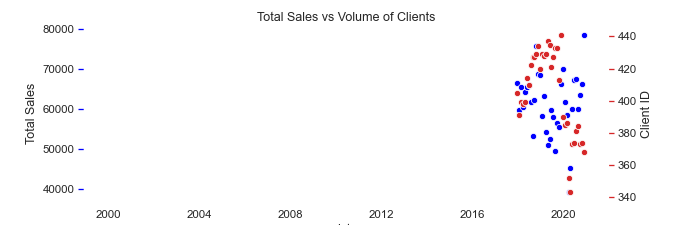

In [211]:
# We will compare if Sales and Number of Clients hold a relation
date_df = Project_df[Project_df['Month']!=24]
date_df['date'] = pd.to_datetime(date_df[['Year','Month']].assign(DAY=1),format="%m-%d-%Y")
salesmonth = date_df.groupby(['date']).agg({'Total Sales':'mean','Client ID':'count'}).reset_index()

# Create combo chart
fig, ax1 = plt.subplots(figsize=(9,3))

# Bar plot creation
ax1.set_title('Total Sales vs Volume of Clients')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Sales')
ax1 = sns.scatterplot(x='date', y='Total Sales', data = salesmonth, color = 'blue')
ax1.tick_params(axis='y', color = 'blue')

# Specify we want to share the same x-axis
ax2 = ax1.twinx()

# Line plot creation
ax2.set_ylabel('Clients Volume')
ax2 = sns.scatterplot(x='date', y='Client ID', data = salesmonth, color=color)
ax2.tick_params(axis='y', color=color)
ax2.grid(None)

# Show plot
plt.show()

# Intento de Mauricio de hacer la scatter plot y agregar la regresión (fallido)

<IPython.core.display.Javascript object>


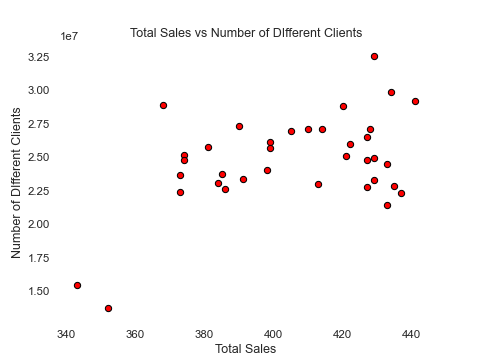

In [162]:
x_axis = total_sales.index.tolist()
y_axis = total_sales.values.tolist()

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
plt.title("Total Sales vs Number of DIfferent Clients")
plt.xlabel("Total Sales")
plt.ylabel("Number of DIfferent Clients")

plt.show()

In [212]:
x_axis = total_sales["Total Sales"].mean()
y_axis = total_sales.reset_index()["Number of DIfferent Clients"].mean()

corr_value = round(st.pearsonr(x_axis,y_axis)[0],2)
print(f"Total Sales vs Number of DIfferent Clients correlation is {corr_value}")

slope, int, r, p, std_err = st.linregress(x_axis, y_axis)
      
fit = slope * x_axis + int

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
plt.title("Total Sales vs Number of DIfferent Clients")
plt.xlabel("Total Sales")
plt.ylabel("Number of DIfferent Clients")
plt.plot(x_axis,fit,"-")

plt.show()

IndexError: invalid index to scalar variable.

# Fin de intento de Mauricio

# Acá va la parte de Erick del histograma de maduración de ventas por cliente.

#### Acá va el data frame

#### Acá va el plot 

# Termina la parte de Erick.

# Part 3 - Analyzing Data by Category.

#### We will try to analyze Sales by Category 

In [179]:
# Sum the Total Sales by Category
category_sales_df=(pd.DataFrame(Project_df.groupby('Category')[["Total Sales","Points Worth ($)"]].sum()))

#Calculate expense ratio
#We define expense ratio as the cost of the Points Worth divided by the Total Sales
#The objective behind calculating the expense ratio is to compare all categories to see if the percentage of money returned to customer is uniform between categories or if it is different
#Higher ratios indicate more money returned to customers.

category_sales_df["ratio_expense"]=category_sales_df["Points Worth ($)"]/category_sales_df["Total Sales"]*100
category_sales_df

,Total Sales,Points Worth ($),ratio_expense
Category,,,
C1,71293206,2966554.52,4.161062
C2,151264564,4974196.14,3.288408
C3,114860938,3225996.74,2.808611
C4,145732746,4302094.96,2.952044
C5,95289584,2235232.02,2.345725
C6,313808335,6012309.02,1.915918


<IPython.core.display.Javascript object>


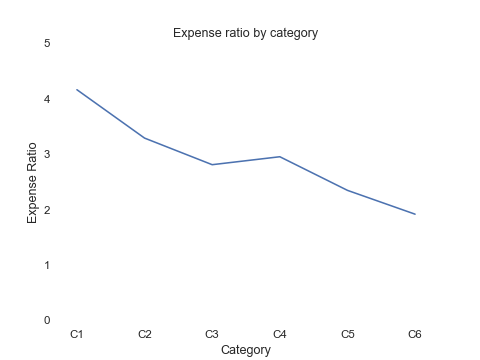

In [187]:
total_sales=category_sales_df["Total Sales"].sum()
x_axis=np.arange(0, 6, 1)
y_axis=category_sales_df["ratio_expense"]

plt.title("Expense ratio by category")
plt.xlabel("Category")
plt.ylabel("Expense Ratio")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["C1","C2","C3","C4","C5","C6"], rotation="horizontal")


# Have to plot our chart once again as it doesn't stick after being shown
plt.plot(x_axis, y_axis)

plt.ylim(0, 5)  
plt.show()

plt.savefig("plots/Expense ratio comparison by category.png")

<IPython.core.display.Javascript object>


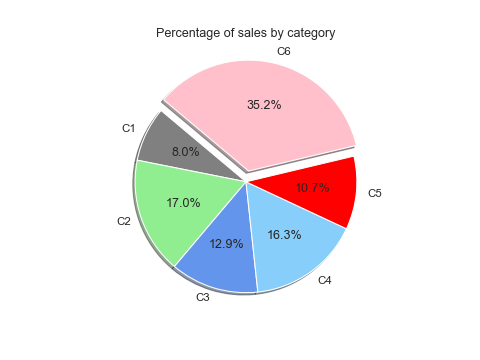

In [186]:
total_sales=category_sales_df["Total Sales"].sum()
sales_category=category_sales_df["Total Sales"]/total_sales*100
sales_category
names_category= ["C1","C2","C3","C4","C5","C6"]

# The colors of each section of the pie chart
colors = ["grey", "lightgreen", "cornflowerblue", "lightskyblue","red", "pink"]


explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.1)


plt.pie(sales_category, explode=explode, labels=names_category, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percentage of sales by category")

plt.savefig("plots/Sales percentage by category.png")

In [8]:
# Getting the min Monthly Sales by Category
min_sales_by_category = Project_df.drop_duplicates("Category").sort_values("Category", ascending= True)[["Category", "Min Monthly Sales"]].set_index('Category')
min_sales_by_category

,Min Monthly Sales
Category,
C1,11000
C2,23000
C3,41000
C4,59000
C5,115000
C6,183000


<IPython.core.display.Javascript object>


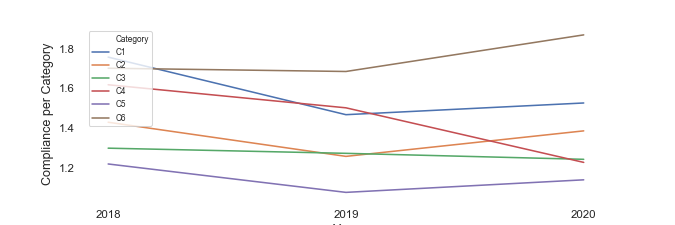

In [130]:
# Comparing Compliance
category_com = Project_df.groupby(['Year','Category'])['Compliance'].mean().reset_index()

# Create line char for each category
sns.set(rc={'axes.facecolor':'white'})
fig, ax1 = plt.subplots(figsize = (9,3))
g = sns.lineplot(data=category_com, x="Year", y="Compliance",hue='Category')
plt.grid(False)
plt.legend(loc=2, prop={'size': 8})
plt.xlabel('Year')
plt.ylabel('Compliance per Category')
g.set(xticks=[2018, 2019, 2020])



plt.show()

plt.savefig("plots/Compliance per Category.png")

In [13]:
# Creating Data Frames for ploting Avg Quarterly Sales vs Avg Min Monthly Sales by Category 
gb_category = Project_df.groupby('Category')

Project_c1_df = gb_category.get_group("C1")
Project_c2_df = gb_category.get_group("C2")
Project_c3_df = gb_category.get_group("C3")
Project_c4_df = gb_category.get_group("C4")
Project_c5_df = gb_category.get_group("C5")
Project_c6_df = gb_category.get_group("C6")

avgsales_vs_avgmin_c1 = Project_c1_df.groupby(['Year', 'Quarter'])
avgsales_vs_avgmin_c1 = avgsales_vs_avgmin_c1['Min Monthly Sales', 'Total Sales'].mean()
avgsales_vs_avgmin_c1 = avgsales_vs_avgmin_c1.reset_index()
avgsales_vs_avgmin_c1 = avgsales_vs_avgmin_c1[['Total Sales', 'Min Monthly Sales']]
avgsales_vs_avgmin_c1["Quarter Number"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avgsales_vs_avgmin_c1 = avgsales_vs_avgmin_c1.set_index('Quarter Number')

avgsales_vs_avgmin_c2 = Project_c2_df.groupby(['Year', 'Quarter'])
avgsales_vs_avgmin_c2 = avgsales_vs_avgmin_c2['Min Monthly Sales', 'Total Sales'].mean()
avgsales_vs_avgmin_c2 = avgsales_vs_avgmin_c2.reset_index()
avgsales_vs_avgmin_c2 = avgsales_vs_avgmin_c2[['Total Sales', 'Min Monthly Sales']]
avgsales_vs_avgmin_c2["Quarter Number"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avgsales_vs_avgmin_c2 = avgsales_vs_avgmin_c2.set_index('Quarter Number')

avgsales_vs_avgmin_c3 = Project_c3_df.groupby(['Year', 'Quarter'])
avgsales_vs_avgmin_c3 = avgsales_vs_avgmin_c3['Min Monthly Sales', 'Total Sales'].mean()
avgsales_vs_avgmin_c3 = avgsales_vs_avgmin_c3.reset_index()
avgsales_vs_avgmin_c3 = avgsales_vs_avgmin_c3[['Total Sales', 'Min Monthly Sales']]
avgsales_vs_avgmin_c3["Quarter Number"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avgsales_vs_avgmin_c3 = avgsales_vs_avgmin_c3.set_index('Quarter Number')

avgsales_vs_avgmin_c4 = Project_c4_df.groupby(['Year', 'Quarter'])
avgsales_vs_avgmin_c4 = avgsales_vs_avgmin_c4['Min Monthly Sales', 'Total Sales'].mean()
avgsales_vs_avgmin_c4 = avgsales_vs_avgmin_c4.reset_index()
avgsales_vs_avgmin_c4 = avgsales_vs_avgmin_c4[['Total Sales', 'Min Monthly Sales']]
avgsales_vs_avgmin_c4["Quarter Number"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avgsales_vs_avgmin_c4 = avgsales_vs_avgmin_c4.set_index('Quarter Number')

avgsales_vs_avgmin_c5 = Project_c5_df.groupby(['Year', 'Quarter'])
avgsales_vs_avgmin_c5 = avgsales_vs_avgmin_c5['Min Monthly Sales', 'Total Sales'].mean()
avgsales_vs_avgmin_c5 = avgsales_vs_avgmin_c5.reset_index()
avgsales_vs_avgmin_c5 = avgsales_vs_avgmin_c5[['Total Sales', 'Min Monthly Sales']]
avgsales_vs_avgmin_c5["Quarter Number"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avgsales_vs_avgmin_c5 = avgsales_vs_avgmin_c5.set_index('Quarter Number')

avgsales_vs_avgmin_c6 = Project_c6_df.groupby(['Year', 'Quarter'])
avgsales_vs_avgmin_c6 = avgsales_vs_avgmin_c6['Min Monthly Sales', 'Total Sales'].mean()
avgsales_vs_avgmin_c6 = avgsales_vs_avgmin_c6.reset_index()
avgsales_vs_avgmin_c6 = avgsales_vs_avgmin_c6[['Total Sales', 'Min Monthly Sales']]
avgsales_vs_avgmin_c6["Quarter Number"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avgsales_vs_avgmin_c6 = avgsales_vs_avgmin_c6.set_index('Quarter Number')

C:\Users\HP\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':
C:\Users\HP\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\Users\HP\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\Users\HP\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\Users\HP\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: Indexing with multiple keys (implicitly converted t

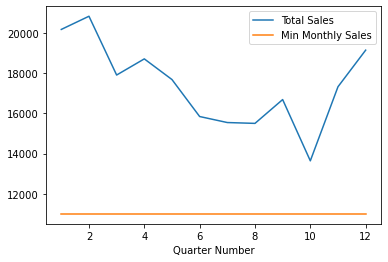

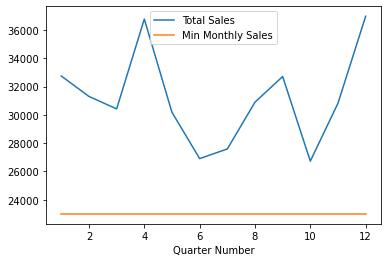

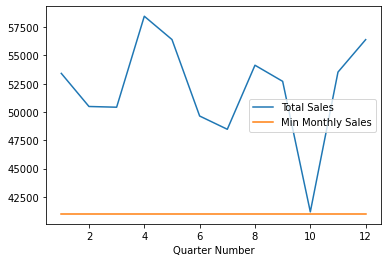

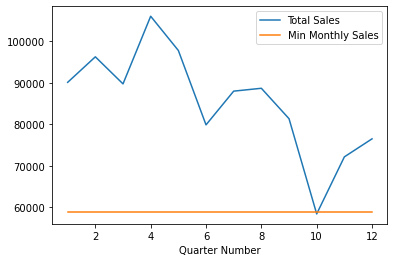

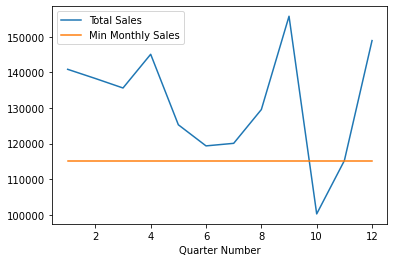

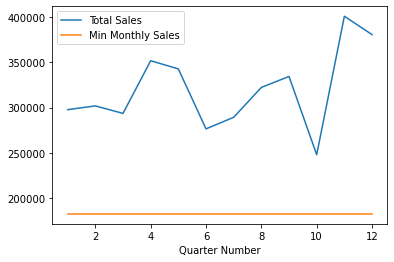

In [166]:
%matplotlib inline

avgsales_vs_avgmin_c1.plot()
plt.savefig("plots/Average Sales vs Average Min Purchase (C1).png")
avgsales_vs_avgmin_c2.plot()
plt.savefig("plots/Average Sales vs Average Min Purchase (C2).png")
avgsales_vs_avgmin_c3.plot()
plt.savefig("plots/Average Sales vs Average Min Purchase (C3).png")
avgsales_vs_avgmin_c4.plot()
plt.savefig("plots/Average Sales vs Average Min Purchase (C4).png")
avgsales_vs_avgmin_c5.plot()
plt.savefig("plots/Average Sales vs Average Min Purchase (C5).png")
avgsales_vs_avgmin_c6.plot()
plt.savefig("plots/Average Sales vs Average Min Purchase (C6).png")

# Part 3 - Analyzing Data by Location.

#### We will try to analyze Sales by Client's location.

In [190]:
# We will create a States list to use it on our API/json requests
unique_locations = Project_df.drop_duplicates("State")
locations = unique_locations['State'].tolist()
locations

['Ciudad de Mexico',
 'Tabasco',
 'Chiapas',
 'Hidalgo',
 'Jalisco',
 'Guanajuato',
 'Estado de Mexico',
 'Nayarit',
 'Campeche',
 'Zacatecas',
 'Guerrero',
 'Oaxaca',
 'Sinaloa',
 'Nuevo Leon',
 'Michoacan',
 'Aguascalientes',
 'Yucatan',
 'Veracruz',
 'Puebla',
 'San Luis Potosi',
 'Queretaro',
 'Tlaxcala',
 'Morelos',
 'Tamaulipas',
 'Quintana Roo',
 'Coahuila',
 'Colima']

In [191]:
# Building the URL
url = "http://api.openweathermap.org/data/2.5/weather?"
appid = api_key
units = "metric"
url = f"{url}appid={appid}&units={units}&q="

# Creating a list for storing information
location_info = []

# For loop
for location in locations:

    # Generating a unique URL for each location
    location_url = url + location

    # API request for each location
    try:
        location_geo = requests.get(location_url).json()
        
        # Retrieving data
        location_lat = location_geo["coord"]["lat"]
        location_lng = location_geo["coord"]["lon"]
        
        # Append the retrieved information into city_info
        location_info.append({"Location": location, 
                          "Lat": location_lat, 
                          "Lng": location_lng})

    # Exception for a not found value
    except:
        pass

In [192]:
locations_df = pd.DataFrame(unique_locations["State"]).reset_index().reset_index()
locations_df = locations_df[["level_0", "State"]]

location_info_df = pd.DataFrame(location_info).reset_index().reset_index()
location_info_df = location_info_df[["level_0", "Lat", "Lng"]]

geo_location_df = pd.merge(locations_df, location_info_df, how="outer", on=["level_0"])
geo_location_df

,level_0,State,Lat,Lng
0,0,Ciudad de Mexico,19.4285,-99.1277
1,1,Tabasco,18.0000,-92.6667
2,2,Chiapas,16.5000,-92.5000
3,3,Hidalgo,20.5000,-99.0000
4,4,Jalisco,3.2541,-76.5435
5,5,Guanajuato,21.0186,-101.2591
6,6,Estado de Mexico,19.3333,-99.5000
7,7,Nayarit,22.0000,-105.0000
8,8,Campeche,19.0000,-90.5000
9,9,Zacatecas,23.0000,-103.0000


In [193]:
# test json request to check if coordinates are correct
url = 'http://api.openweathermap.org/data/2.5/weather?appid=cc7940371d3f080d3c11499de77917b7&units=metric&q='
url_test = url + "Tabasco"
test = requests.get(url_test).json()
test

{'coord': {'lon': -92.6667, 'lat': 18},
 'weather': [{'id': 721,
   'main': 'Haze',
   'description': 'haze',
   'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 27,
  'feels_like': 29.65,
  'temp_min': 27,
  'temp_max': 27,
  'pressure': 1016,
  'humidity': 69},
 'visibility': 4828,
 'wind': {'speed': 2.06, 'deg': 210},
 'clouds': {'all': 40},
 'dt': 1613508890,
 'sys': {'type': 1,
  'id': 7160,
  'country': 'MX',
  'sunrise': 1613479041,
  'sunset': 1613520742},
 'timezone': -21600,
 'id': 3516458,
 'name': 'Tabasco',
 'cod': 200}

In [194]:
# Merging the coordinates with each state's Total Sales
totalsales_state = Project_df.groupby("State").sum()

totalsales_state = pd.merge(totalsales_state, geo_location_df, how="outer", on=["State"])
totalsales_state = totalsales_state[["Total Sales", "Lat", "Lng"]]
totalsales_state["Total Sales"] = totalsales_state["Total Sales"].fillna(0)
totalsales_state = totalsales_state.sort_values("Total Sales", ascending= False)
totalsales_state

,Total Sales,Lat,Lng
3,151778783,19.4285,-99.1277
6,119838185,19.3333,-99.5000
10,94986113,3.2541,-76.5435
7,63756184,21.0186,-101.2591
8,53652035,17.6667,-100.0000
24,51269812,19.3333,-96.6667
15,44910270,17.0500,-96.7167
11,42211820,19.1667,-101.8333
14,41229026,25.6667,-100.0000
9,37343595,20.5000,-99.0000


In [196]:
# Sales heatmap
sales = totalsales_state["Total Sales"].astype(float)
maxsales = sales.max()
location_df = totalsales_state[["Lat", "Lng"]]

In [197]:
figure_layout = {'width': '1000px','height': '600px'}
gmaps.configure(api_key=g_key)
fig = gmaps.figure(layout=figure_layout)
heat_layer = gmaps.heatmap_layer(location_df, weights = sales, dissipating = False, max_intensity = maxsales, point_radius = 1.5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='600px', width='1000px'))

### DIVIDE states by economic region:

### Mexico by region (Banxico's methodology):  (https://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?sector=2&accion=consultarCuadro&idCuadro=CR122&locale=es)
### La regionalización del país que se utiliza en esta sección es:
### el norte incluye B.C, Chih., Coah., N.L., Son. y Tam.;
### el centro norte considera a B.C.S, Ags., Col., Dgo., Jal., Mich., Nay., S.L.P., Sin. y Zac.;
### el centro lo integran D.F., Edo. de Méx., Gto., Hgo., Mor., Pue., Qro. y Tlx.; y
### el sur Camp., Chis., Gro, Oax., Q.Roo, Tab., Ver. y Yuc.

In [200]:
#NORTH ZONE
#COAHUILA, SONORA, TAMAULIPAS, NUEVO LEON. (NO SALES IN B.C AND CHI and sonora)

North_Zone=Project_df[(Project_df.State =="Nuevo Leon")|(Project_df.State =="Tamaulipas")
                      |(Project_df.State =="Coahuila")]

North_Zone_II=North_Zone[["Year","Category","Total Sales","Total Points","Points Worth ($)"]]
north_zone_category= North_Zone_II.groupby(['Year',"Category"]).sum()
north_zone_category["ratio_expense"]=north_zone_category["Points Worth ($)"]/north_zone_category["Total Sales"]*100
north_zone_category

Total Sales  Total Points  Points Worth ($)  ratio_expense
Year Category                                                            
2018 C1            2755964        140322         120676.92       4.378755
     C2            4381837        145540         125164.40       2.856437
     C3            3531676        121669         104635.34       2.962767
     C4            5663591        221379         190385.94       3.361576
     C5            1828502         61259          52682.74       2.881197
2019 C1            3432673        144859         124578.74       3.629205
     C2            4468471        150725         129623.50       2.900847
     C3            3280995         96455          82951.30       2.528236
     C4            4968906        156675         134740.50       2.711673
     C5            1611831         41464          35659.04       2.212331
     C6             110471             0              0.00       0.000000
2020 C1            2798467        138112         118776.32       4.244335
     C2            3394687        148833         127996.38       3.770491
     C3            2753909         50248          43213.28       1.569162
     C4            3134764         78384          67410.24       2.150409
     C5             386540           591            508.26       0.131490

In [201]:
# NORTH CENTRE ZONE
#AGUASCALIENTES, COLIMA, DURANGO,JALISCO,MICHOACAN,NAYARIT,SAN LUIS POTOSI, ZACATECAS, SINALOA

Northcentre_Zone=Project_df[(Project_df.State =="Aguascalientes")|(Project_df.State =="Colima")
                            |(Project_df.State =="Jalisco") | (Project_df.State == "Nayarit")
                            |(Project_df.State =="Michoacan")|(Project_df.State =="San Luis Potosi")
                            |(Project_df.State =="Sinaloa")|(Project_df.State =="Zacatecas")]
                            
Northcentre_Zone_II=Northcentre_Zone[["Year","Category","Total Sales","Total Points","Points Worth ($)"]]
northcentre_zone_category= Northcentre_Zone_II.groupby(['Year',"Category"]).sum()
northcentre_zone_category["ratio_expense"]=northcentre_zone_category["Points Worth ($)"]/northcentre_zone_category["Total Sales"]*100
northcentre_zone_category  

Total Sales  Total Points  Points Worth ($)  ratio_expense
Year Category                                                            
2018 C1            5155177        241994         208114.84       4.037007
     C2           12325289        523680         450364.80       3.653990
     C3           12847756        428887         368842.82       2.870873
     C4            9081269        317934         273423.24       3.010848
     C5            7089269        199237         171343.82       2.416946
     C6           27240044        584486         502657.96       1.845291
2019 C1            5300625        245481         211113.66       3.982807
     C2           13110764        478492         411503.12       3.138666
     C3           10161607        343371         295299.06       2.906027
     C4            6026050        193842         166704.12       2.766391
     C5            8691301        215227         185095.22       2.129661
     C6           30007436        583383         501709.38       1.671950
2020 C1            5749069        289178         248693.08       4.325797
     C2           13315999        503725         433203.50       3.253256
     C3            7610703        238058         204729.88       2.690026
     C4            9302158        284365         244553.90       2.629002
     C5            9004293        246788         212237.68       2.357072
     C6           19776936        276464         237759.04       1.202204

In [203]:
# CENTRAL ZONE
#CIUDAD DE MEXICO, ESTADO DE MEXICO, GUANAJUATO,HIDALGO,MORELOS, PUEBLA,QUERETARO,TLAXCALA

central_Zone=Project_df[(Project_df.State =="Ciudad de Mexico")|(Project_df.State =="Estado de Mexico")
                            |(Project_df.State =="Guanajuato") | (Project_df.State == "Hidalgo")
                            |(Project_df.State =="Morelos")|(Project_df.State =="Puebla")
                            |(Project_df.State =="Queretaro")|(Project_df.State =="Tlaxcala")]

central_Zone_II=central_Zone[["Year","Category","Total Sales","Total Points","Points Worth ($)"]]
central_zone_category= central_Zone_II.groupby(['Year',"Category"]).sum()
central_zone_category["ratio_expense"]=central_zone_category["Points Worth ($)"]/central_zone_category["Total Sales"]*100
central_zone_category  

Total Sales  Total Points  Points Worth ($)  ratio_expense
Year Category                                                            
2018 C1           11678987        623874         536531.64       4.593991
     C2           28981652       1187684        1021408.24       3.524327
     C3           20926242        761810         655156.60       3.130790
     C4           31159240       1121414         964416.04       3.095121
     C5           11748046        346511         297999.46       2.536587
     C6           50400640       1164981        1001883.66       1.987839
2019 C1           11143352        563636         484726.96       4.349921
     C2           25066542        957141         823141.26       3.283825
     C3           20179602        666617         573290.62       2.840941
     C4           28483417       1001008         860866.88       3.022344
     C5           11544429        319090         274417.40       2.377055
     C6           37800807        893538         768442.68       2.032874
2020 C1            9498309        427949         368036.14       3.874754
     C2           21290434        787089         676896.54       3.179346
     C3           16096352        467835         402338.10       2.499561
     C4           21348599        685547         589570.42       2.761635
     C5           14490360        359423         309103.78       2.133168
     C6           51122139       1087359         935128.74       1.829205

In [204]:
#SOUTH ZONE
#CHIAPAS,GUERRERO,OAXACA,Q.ROO, TABASCO, VERACRUZ, YUCATAN,CAMPECHE

south_Zone=Project_df[(Project_df.State =="Chiapas")|(Project_df.State =="Guerrero")
                            |(Project_df.State =="Oaxaca") | (Project_df.State == "Quintana Roo")
                            |(Project_df.State =="Tabasco")|(Project_df.State =="Veracruz")
                            |(Project_df.State =="Yucatan")|(Project_df.State =="Campeche")]

south_Zone_II=south_Zone[["Year","Category","Total Sales","Total Points","Points Worth ($)"]]
south_zone_category= south_Zone_II.groupby(['Year',"Category"]).sum()
south_zone_category["ratio_expense"]=south_zone_category["Points Worth ($)"]/south_zone_category["Total Sales"]*100
south_zone_category

Total Sales  Total Points  Points Worth ($)  ratio_expense
Year Category                                                            
2018 C1            5480063        258273         222114.78       4.053143
     C2            9473985        360515         310042.90       3.272571
     C3            6901056        238697         205279.42       2.974609
     C4            9356472        330753         284447.58       3.040116
     C5           10975212        313527         269633.22       2.456747
     C6           29127500        764467         657441.62       2.257117
2019 C1            4162339        190884         164160.24       3.943942
     C2            8255171        288234         247881.24       3.002739
     C3            5421778        180368         155116.48       2.860989
     C4            9413900        336853         289693.58       3.077296
     C5           10405122        320306         275463.16       2.647380
     C6           34429857        912885         785081.10       2.280233
2020 C1            4138181        184920         159031.20       3.843022
     C2            7199733        252291         216970.26       3.013588
     C3            5149262        157144         135143.84       2.624528
     C4            7794380        274282         235882.52       3.026315
     C5            7514679        175684         151088.24       2.010575
     C6           33792505        723494         622204.84       1.841251

In [205]:
NZ=North_Zone["Total Sales"].sum()
NCZ= Northcentre_Zone["Total Sales"].sum()
cZ=central_Zone["Total Sales"].sum()
sZ=south_Zone["Total Sales"].sum()
total_sales_3_years= NZ+NCZ+cZ+sZ

sales_per_zone=[NZ,NCZ,cZ,sZ]
names_zones= ["North Zone","North Centre Zone","Central zone","South Zone"]
percentage_sales_zones={"North Zone":NZ,"North Centre Zone": NCZ,"Central zone":cZ,"South Zone":sZ}

percentage_sales_zones

{'North Zone': 48503284,
 'North Centre Zone': 211795745,
 'Central zone': 422959149,
 'South Zone': 208991195}

<IPython.core.display.Javascript object>


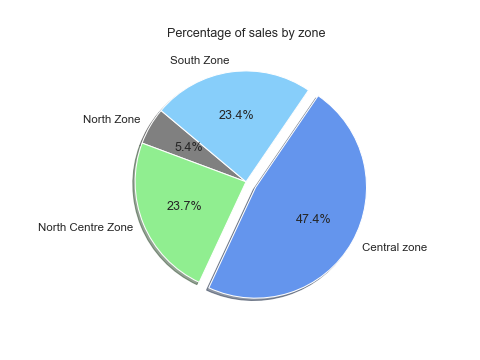

In [207]:
sales_per_zone=[NZ,NCZ,cZ,sZ]
names_zones= ["North Zone","North Centre Zone","Central zone","South Zone"]

# The colors of each section of the pie chart
colors = ["grey", "lightgreen", "cornflowerblue", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.1, 0)


plt.pie(sales_per_zone, explode=explode, labels=names_zones, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Percentage of sales by zone")

plt.savefig("plots/Percentage of sales by zone.png")
plt.show()

In [208]:
NZ_2018=North_Zone[North_Zone.Year ==2018]["Total Sales"].sum()
NZ_2019=North_Zone[North_Zone.Year ==2019]["Total Sales"].sum()
NZ_2020=North_Zone[North_Zone.Year ==2020]["Total Sales"].sum()

NCZ_2018=Northcentre_Zone[Northcentre_Zone.Year ==2018]["Total Sales"].sum()
NCZ_2019=Northcentre_Zone[Northcentre_Zone.Year ==2019]["Total Sales"].sum()
NCZ_2020=Northcentre_Zone[Northcentre_Zone.Year ==2020]["Total Sales"].sum()

cZ_2018=central_Zone[central_Zone.Year ==2018]["Total Sales"].sum()
cZ_2019=central_Zone[central_Zone.Year ==2019]["Total Sales"].sum()
cZ_2020=central_Zone[central_Zone.Year ==2020]["Total Sales"].sum()

sZ_2018=south_Zone[south_Zone.Year ==2018]["Total Sales"].sum()
sZ_2019=south_Zone[south_Zone.Year ==2019]["Total Sales"].sum()
sZ_2020=south_Zone[south_Zone.Year ==2020]["Total Sales"].sum()

<IPython.core.display.Javascript object>


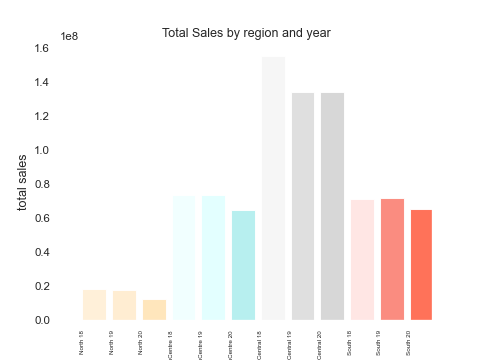

In [210]:
%matplotlib notebook

sales_byzone = [NZ_2018, NZ_2019, NZ_2020, 
                NCZ_2018, NCZ_2019,NCZ_2020,
                cZ_2018,cZ_2019,cZ_2020,
                sZ_2018,sZ_2019,sZ_2020]

x_axis = np.arange(len(sales_byzone))

plt.bar(x_axis, sales_byzone, color=['papayawhip',"blanchedalmond","moccasin","azure","lightcyan","paleturquoise","whitesmoke","gainsboro","lightgrey","mistyrose","salmon","tomato"], alpha=0.9, align="edge")


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["North 18","North 19","North 20",
                            "NorthCentre 18","NorthCentre 19","NorthCentre 20",
                            "Central 18","Central 19","Central 20",
                            "South 18","South 19","South 20"], rotation="vertical", fontsize= 6)
                            

plt.xlim(-0.75, len(x_axis)-0.25)
#plt.ylim(0, max(sales_byzone))   
    
plt.title("Total Sales by region and year")
plt.xlabel("Zones")
plt.ylabel("total sales")

plt.savefig("plots/Total Sales by region and year.png")
plt.show()